In [289]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
import warnings
from matplotlib.ticker import PercentFormatter
from colorama import Fore, Back, Style

In [290]:
warnings.filterwarnings('ignore')

In [291]:
#permet de voir le nom du répertoire courant
path = os.getcwd()
print(f"Le répertoire courant est : {path} \n")

Le répertoire courant est : /home/matthieu 



In [292]:
#----------------------------- Récupération des fichier dans un dataframe -----------------------------------------
#fns=glob.glob("*.csv")
fns=glob.glob('fao_2013/*.csv', recursive=True)

df_bigTab = pd.DataFrame(columns=['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code Année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'])


nameModificateur=['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code Année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole']




In [293]:

#-------------------------- Construction du big Tableau avec tous les fichiers--------------------------------------
for fn in fns:
    fns = fn[13:-4]
    df=pd.read_csv(fn, names=nameModificateur, header=0)
    print("\n")  
    print(f"{Fore.YELLOW}---------------------- Récupération du fichier {fns} --------------------{Style.RESET_ALL}\n")
    print(f"- {fn:50s} ({df.shape[0]:6d}, {df.shape[1]:2d}) - {Fore.BLACK}{Back.CYAN}{fns}{Style.RESET_ALL} \n")
    print(f"{Fore.YELLOW}------------------------------------------------------------------------------{Style.RESET_ALL}\n")
    print("\n")
    print(f"{Fore.YELLOW}------------------------ Analyse du fichier {fns} ------------------------{Style.RESET_ALL}\n")
    print(f"{df.describe()}")
    print("\n")
    print(f"{Fore.YELLOW}-------------------------------------------------------------------------------{Style.RESET_ALL}\n")
    df_bigTab=df_bigTab.append(df)




---------------------- Récupération du fichier TAT_2013_cereal --------------------

- fao_2013/FAOSTAT_2013_cereal.csv                   ( 16057, 14) - TAT_2013_cereal 

------------------------------------------------------------------------------



------------------------ Analyse du fichier TAT_2013_cereal ------------------------

          Code Pays  Code Élément  Code Produit  Code Année    Année  \
count  16057.000000  16057.000000  16057.000000     16057.0  16057.0   
mean     128.528243   3944.553030   2554.817836      2013.0   2013.0   
std       75.298386   2191.371293     99.697147         0.0      0.0   
min        1.000000    645.000000   2511.000000      2013.0   2013.0   
25%       66.000000    684.000000   2513.000000      2013.0   2013.0   
50%      122.000000   5142.000000   2516.000000      2013.0   2013.0   
75%      191.000000   5521.000000   2520.000000      2013.0   2013.0   
max      351.000000   5911.000000   2805.000000      2013.0   2013.0   

          

<AxesSubplot:xlabel='Valeur'>

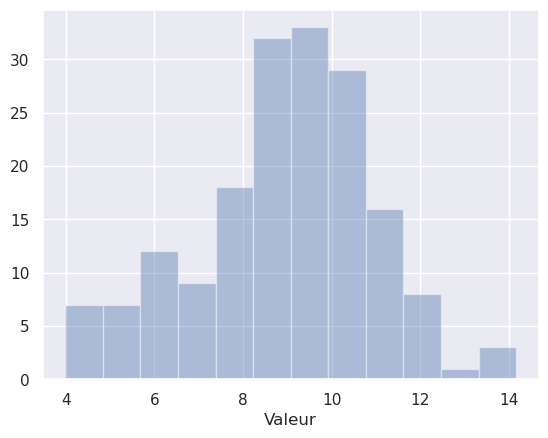

In [294]:
#---------------------------parler des variables, qualitative, quantitative----------------------------------------
df_pop=df_bigTab.query('Produit == "Population"').loc[:,["Code Pays","Pays","Produit","Valeur", "Unité"]]

sns.distplot( a=np.log(df_pop["Valeur"]), hist=True, kde=False, rug=False )


    Code Pays                      Pays     Produit     Valeur         Unité
174       351                     China  Population  1416667.0  1000 persons
34         41           China, mainland  Population  1385567.0  1000 persons
73        100                     India  Population  1252140.0  1000 persons
165       231  United States of America  Population   320051.0  1000 persons
74        101                 Indonesia  Population   249866.0  1000 persons
..        ...                       ...         ...        ...           ...
85         83                  Kiribati  Population      102.0  1000 persons
4           8       Antigua and Barbuda  Population       90.0  1000 persons
47         55                  Dominica  Population       72.0  1000 persons
17         17                   Bermuda  Population       65.0  1000 persons
131       188     Saint Kitts and Nevis  Population       54.0  1000 persons

[175 rows x 5 columns]


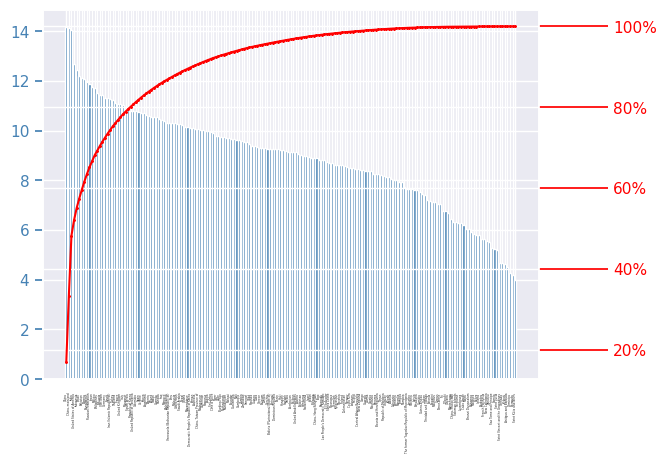

In [295]:
#------------------------------------------ Analyse ---------------------------------------------------------------

df_pop.sort_values ('Valeur', ascending = False,inplace=True)

print(df_pop)
#add column to display cumulative percentage
df_pop['cumperc'] = df_pop['Valeur'].cumsum()/df_pop['Valeur'].sum()*100

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 1

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df_pop["Pays"], np.log(df_pop["Valeur"]), color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df_pop["Pays"], df_pop["cumperc"], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax.tick_params(axis='x', labelrotation=90, labelsize=2)
ax2.tick_params(axis='y', colors=color2, length=50)

#display Pareto chart
plt.show()

In [296]:
#--------------------------------- Nombre d'humains sur la planète (question 1)------------------------------------


pop_planetaire = df_pop['Valeur'].sum()
print (f"La population mondiale en 2013 est de : {pop_planetaire}")
#8413993 sans drop_duplicate
#Le résultat change lorsque l'on enlève les doublons
df_pop = df_pop.loc[df_pop["Pays"] != "China"]
pop_planetaire = df_pop['Valeur'].sum()
print (f"La population mondiale en 2013 est de : {pop_planetaire}")

La population mondiale en 2013 est de : 8413993.0
La population mondiale en 2013 est de : 6997326.0


In [297]:
#--------------------------------------Redondances question 2------------------------------------------------------

"""
Production+Importations - Quantité + Variation de stock - Exportation =  
dispo Intérieur =
Aliments pour animaux + Semences + Pertes + Traitement + Autres Utilisations + Nourriture
"""
#On a bien une équation à trois termes 

'\nProduction+Importations - Quantité + Variation de stock - Exportation =  \ndispo Intérieur =\nAliments pour animaux + Semences + Pertes + Traitement + Autres Utilisations + Nourriture\n'

In [298]:
#-------------------Construction d'un tableau de la disponnibilité alimentaire (question 3)-------------------------

#SA  => Sous alimentation
#DA  => Disponnibilité alimentaire (kg/personne/an)
#DAP => Disponnibilité alimentaire en protéines (g/personne/jour)

df_SA=df_bigTab.query('Produit == "Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)"').loc[:,["Code Pays","Pays","Produit", "Valeur", "Unité"]]
df_DA=df_bigTab.query('Élément == "Disponibilité alimentaire en quantité (kg/personne/an)"').loc[:,["Code Pays","Pays","Produit", "Valeur", "Unité"]]
df_DAP=df_bigTab.query('Élément == "Disponibilité de protéines en quantité (g/personne/jour)"').loc[:,["Code Pays","Pays","Produit", "Valeur", "Unité"]]


df_aliment=pd.merge(df_pop,df_DA,on="Code Pays")
df_aliment=df_aliment.pivot_table('Valeur_x', index=['Code Pays','Pays_x', 'Produit_y'], columns='Valeur_y')
df_aliment

#Abandon de la méthode ici 


Valeur_y                                    -1.93     0.00     0.01    \
Code Pays Pays_x  Produit_y                                             
1         Armenia Abats Comestible              NaN      NaN      NaN   
                  Agrumes, Autres               NaN      NaN      NaN   
                  Aliments pour enfants         NaN      NaN      NaN   
                  Ananas                        NaN      NaN      NaN   
                  Animaux Aquatiques Autre      NaN   2977.0      NaN   
...                                             ...      ...      ...   
276       Sudan   Viande d'Ovins/Caprins        NaN      NaN      NaN   
                  Viande de Bovins              NaN      NaN      NaN   
                  Viande de Volailles           NaN      NaN      NaN   
                  Viande, Autre                 NaN      NaN      NaN   
                  Épices, Autres                NaN      NaN      NaN   

Valeur_y                                     0.02     0.03     0.04    \
Code Pays Pays_x  Produit_y                                             
1         Armenia Abats Comestible              NaN      NaN      NaN   
                  Agrumes, Autres               NaN      NaN      NaN   
                  Aliments pour enfants         NaN      NaN      NaN   
                  Ananas                        NaN      NaN      NaN   
                  Animaux Aquatiques Autre      NaN      NaN      NaN   
...                                             ...      ...      ...   
276       Sudan   Viande d'Ovins/Caprins        NaN      NaN      NaN   
                  Viande de Bovins              NaN      NaN      NaN   
                  Viande de Volailles           NaN      NaN      NaN   
                  Viande, Autre                 NaN      NaN      NaN   
                  Épices, Autres                NaN      NaN      NaN   

Valeur_y                                     0.05     0.06     0.07    \
Code Pays Pays_x  Produit_y                                             
1         Armenia Abats Comestible              NaN      NaN      NaN   
                  Agrumes, Autres               NaN      NaN      NaN   
                  Aliments pour enfants         NaN      NaN      NaN   
                  Ananas                        NaN      NaN      NaN   
                  Animaux Aquatiques Autre      NaN      NaN      NaN   
...                                             ...      ...      ...   
276       Sudan   Viande d'Ovins/Caprins        NaN      NaN      NaN   
                  Viande de Bovins              NaN      NaN      NaN   
                  Viande de Volailles           NaN      NaN      NaN   
                  Viande, Autre                 NaN      NaN      NaN   
                  Épices, Autres                NaN  37964.0      NaN   

Valeur_y                                     0.08    ...   288.12   291.86  \
Code Pays Pays_x  Produit_y                          ...                     
1         Armenia Abats Comestible              NaN  ...      NaN      NaN   
                  Agrumes, Autres               NaN  ...      NaN      NaN   
                  Aliments pour enfants         NaN  ...      NaN      NaN   
                  Ananas                        NaN  ...      NaN      NaN   
                  Animaux Aquatiques Autre      NaN  ...      NaN      NaN   
...                                             ...  ...      ...      ...   
276       Sudan   Viande d'Ovins/Caprins        NaN  ...      NaN      NaN   
                  Viande de Bovins              NaN  ...      NaN      NaN   
                  Viande de Volailles           NaN  ...      NaN      NaN   
                  Viande, Autre                 NaN  ...      NaN      NaN   
                  Épices, Autres                NaN  ...      NaN      NaN   

Valeur_y                                     295.46   303.72   308.07  \
Code Pays Pays_x  Produit_y                                   

In [299]:
#---------------------------------------------Retour à la question 3 ----------------------------------------------

#Récupération des trois fichiers pour le df aliments
fn_vegetaux ="fao_2013/FAOSTAT_2013_vegetal.csv"
vegetaux = pd.read_csv(fn_vegetaux)


fn_population ="fao_2013/FAOSTAT_2013_population.csv"
population = pd.read_csv(fn_population)


fn_animaux ="fao_2013/FAOSTAT_2013_animal.csv"
animaux = pd.read_csv(fn_animaux)


In [300]:
# Ajout d'une colonne 'Origine' dans animaux et vegetaux
animaux['Origine'] = 'Animale'
vegetaux['Origine'] = 'Végétale'

# Union de Végétaux et Animaux
aliments = pd.concat([vegetaux, animaux])

# Projection
aliments = aliments[[
    'Pays',
    'Code Pays',
    'Produit',
    'Code Produit',
    'Origine',
    'Élément',
    'Valeur',
    'Année'
]]

# Table pivot sur aliments
aliments = aliments.pivot_table('Valeur', index=['Code Pays','Pays','Produit','Code Produit','Année','Origine'], columns='Élément')

# Reset index
aliments.reset_index(inplace=True)

# Joindre population et aliments
aliments = pd.merge(aliments, population[['Country', 'Value']], left_on='Pays', right_on='Country')

# Renommer les colonnes
aliments.rename(columns={
    'Aliments pour animaux' : 'alim_ani',
    'Autres utilisations (non alimentaire)' : 'autres_utilisations',
    'Semences' : 'semences',
    'Pertes' : 'pertes',
    'Nourriture' : 'nourriture',
    'Traitement' : 'transfo', # ?
    'Disponibilité intérieure' : 'dispo_int',
    'Disponibilité alimentaire (Kcal/personne/jour)' : 'dispo_alim_kcal_p_j',
    'Disponibilité de protéines en quantité (g/personne/jour)' : 'dispo_prot',
    'Disponibilité de matière grasse en quantité (g/personne/jour)' : 'dispo_mat_gr',
    'Value' : 'population'
}, inplace=True)

# Remplacer les Nan
aliments.replace(np.nan, 0, inplace=True)

# Affichage
print('Résultat : ', aliments.shape[1], 'colonnes, ', aliments.shape[0], 'lignes')
aliments

Résultat :  23 colonnes,  4764 lignes


,Code Pays,Pays,Produit,Code Produit,Année,Origine,alim_ani,Autres Utilisations,dispo_alim_kcal_p_j,Disponibilité alimentaire en quantité (kg/personne/an),...,Exportations - Quantité,Importations - Quantité,nourriture,pertes,Production,semences,transfo,Variation de stock,Country,population
0,2,Afghanistan,Abats Comestible,2736,2013,Animale,0.0,0.0,5.0,1.72,...,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0,Afghanistan,30552
1,2,Afghanistan,"Agrumes, Autres",2614,2013,Végétale,0.0,0.0,1.0,1.29,...,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0,Afghanistan,30552
2,2,Afghanistan,Aliments pour enfants,2680,2013,Végétale,0.0,0.0,1.0,0.06,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,30552
3,2,Afghanistan,Ananas,2618,2013,Végétale,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,30552
4,2,Afghanistan,Bananes,2615,2013,Végétale,0.0,0.0,4.0,2.70,...,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,30552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4759,256,Luxembourg,Viande de Suides,2733,2013,Animale,0.0,0.0,328.0,43.58,...,5.0,17.0,23.0,0.0,11.0,0.0,0.0,0.0,Luxembourg,530
4760,256,Luxembourg,Viande de Volailles,2734,2013,Animale,0.0,0.0,75.0,21.37,...,1.0,10.0,11.0,0.0,2.0,0.0,0.0,0.0,Luxembourg,530
4761,256,Luxembourg,"Viande, Autre",2735,2013,Animale,0.0,0.0,7.0,2.02,...,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,Luxembourg,530
4762,256,Luxembourg,Vin,2655,2013,Végétale,0.0,0.0,100.0,51.41,...,5.0,22.0,27.0,0.0,10.0,0.0,0.0,0.0,Luxembourg,530


In [301]:
#-----------------------------------------réponse de la question 3-------------------------------------------------



print("La disponibilité alimentaire en kcal pour chaque pays")
dispo_kcal=pd.DataFrame()
dispo_kcal["Pays"] = aliments["Pays"]
dispo_kcal["Produit"]=aliments["Produit"]
dispo_kcal["dispo alim en kcal/an"]=aliments["dispo_alim_kcal_p_j"]*aliments["population"]*365
print(dispo_kcal)


print("La disponibilité alimentaire en kg pour les protéines pour chaque Pays et chaque produit ")

dispo_prot=pd.DataFrame()

dispo_prot["Pays"] = aliments["Pays"]
dispo_prot["Produit"]=aliments["Produit"]
dispo_prot["dispo alim prot en kg"]=aliments['dispo_prot']*aliments["population"]*0.365
dispo_prot

La disponibilité alimentaire en kcal pour chaque pays
             Pays                Produit  dispo alim en kcal/an
0     Afghanistan       Abats Comestible             55757400.0
1     Afghanistan        Agrumes, Autres             11151480.0
2     Afghanistan  Aliments pour enfants             11151480.0
3     Afghanistan                 Ananas                    0.0
4     Afghanistan                Bananes             44605920.0
...           ...                    ...                    ...
4759   Luxembourg       Viande de Suides             63451600.0
4760   Luxembourg    Viande de Volailles             14508750.0
4761   Luxembourg          Viande, Autre              1354150.0
4762   Luxembourg                    Vin             19345000.0
4763   Luxembourg         Épices, Autres              1741050.0

[4764 rows x 3 columns]
La disponibilité alimentaire en kg pour les protéines pour chaque Pays et chaque produit 


,Pays,Produit,dispo alim prot en kg
0,Afghanistan,Abats Comestible,8586.6396
1,Afghanistan,"Agrumes, Autres",223.0296
2,Afghanistan,Aliments pour enfants,334.5444
3,Afghanistan,Ananas,0.0000
4,Afghanistan,Bananes,557.5740
...,...,...,...
4759,Luxembourg,Viande de Suides,2331.0725
4760,Luxembourg,Viande de Volailles,1479.8925
4761,Luxembourg,"Viande, Autre",183.7775
4762,Luxembourg,Vin,1.9345


In [302]:
#------------------------------------------------Question 4 --------------------------------------------------------

dispo_alim4=pd.DataFrame()
dispo_alim4["Pays"] = aliments["Pays"]
dispo_alim4["Produit"]=aliments["Produit"]
dispo_alim4["Dispo alimentaire kg/an"]=aliments["Disponibilité alimentaire en quantité (kg/personne/an)"]*aliments["population"]
dispo_alim4["dispo alim en kcal/an"]=dispo_kcal["dispo alim en kcal/an"]
dispo_alim4["Ratio énergie/poids"]=dispo_alim4["dispo alim en kcal/an"]/(dispo_alim4["Dispo alimentaire kg/an"])

dispo_alim4[dispo_alim4.Produit=="Graines Colza/Moutarde"]


,Pays,Produit,Dispo alimentaire kg/an,dispo alim en kcal/an,Ratio énergie/poids
167,Bahamas,Graines Colza/Moutarde,377.0,1100840.0,2920.0
256,Bangladesh,Graines Colza/Moutarde,0.0,0.0,NaN
351,Botswana,Graines Colza/Moutarde,0.0,0.0,NaN
444,Belize,Graines Colza/Moutarde,0.0,121180.0,inf
530,Myanmar,Graines Colza/Moutarde,0.0,0.0,NaN
619,Canada,Graines Colza/Moutarde,35182.0,205462880.0,5840.0
714,Cabo Verde,Graines Colza/Moutarde,0.0,0.0,NaN
797,Sri Lanka,Graines Colza/Moutarde,0.0,7764645.0,inf
891,Congo,Graines Colza/Moutarde,0.0,0.0,NaN
981,Costa Rica,Graines Colza/Moutarde,0.0,0.0,NaN


In [303]:
#-----------------------------------------------Question 5---------------------------------------------------------
dispo_alim5 = dispo_alim4.loc[dispo_alim4["Dispo alimentaire kg/an"] != 0]
dispo_alim5=dispo_alim5.sort_values('Ratio énergie/poids', ascending = False)
dispo_alim5.head(5)

,Pays,Produit,Dispo alimentaire kg/an,dispo alim en kcal/an,Ratio énergie/poids
4182,Oman,Huile d'Arachide,72.64,1325680.0,18250.0
3507,Portugal,Huiles de Foie de Poisso,212.16,3871920.0,18250.0
2586,Maldives,Huile de Colza&Moutarde,6.90,125925.0,18250.0
1540,Ghana,Huile d'Olive,518.10,9455325.0,18250.0
725,Cabo Verde,Huile de Tournesol,9.98,182135.0,18250.0


In [304]:
#-------------------------------------------------Question 6------------------------------------------------------

dispo_alim6 = aliments.loc[aliments["Origine"] == "Végétale"]
dispo_alim6 = dispo_alim6[['Pays', 'Produit','Origine','dispo_int']]
dispo_alim6["Ratio énergie/poids"]=dispo_alim4["Ratio énergie/poids"]
dispo_alim6["Dispo int en kcal"]=dispo_alim6["Ratio énergie/poids"]*dispo_alim6["dispo_int"]*1000000

dispo_alim6


,Pays,Produit,Origine,dispo_int,Ratio énergie/poids,Dispo int en kcal
1,Afghanistan,"Agrumes, Autres",Végétale,41.0,282.945736,1.160078e+10
2,Afghanistan,Aliments pour enfants,Végétale,2.0,6083.333333,1.216667e+10
3,Afghanistan,Ananas,Végétale,0.0,NaN,NaN
4,Afghanistan,Bananes,Végétale,82.0,540.740741,4.434074e+10
6,Afghanistan,Bière,Végétale,3.0,0.000000,0.000000e+00
...,...,...,...,...,...,...
4754,Luxembourg,Sésame,Végétale,0.0,NaN,NaN
4755,Luxembourg,Thé,Végétale,0.0,544.776119,0.000000e+00
4756,Luxembourg,Tomates,Végétale,12.0,178.921569,2.147059e+09
4762,Luxembourg,Vin,Végétale,27.0,709.978603,1.916942e+10


In [305]:
#--------------------------------------------------Question 7-------------------------------------------------------

pop_planetaire

6997326.0